In [1]:
# Birthrate Data 
# !cd data && curl -O \
# https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

import numpy as np 
import pandas as pd 
import seaborn as sns 
path = "/__PROJECTS/aa_CommonData/ml/"
births = pd.read_csv(path+"births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [2]:
births["decade"] = 10 * (births["year"] // 10)
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


/tmp/ipykernel_380351/3327503900.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0, 0.5, 'total births per year')

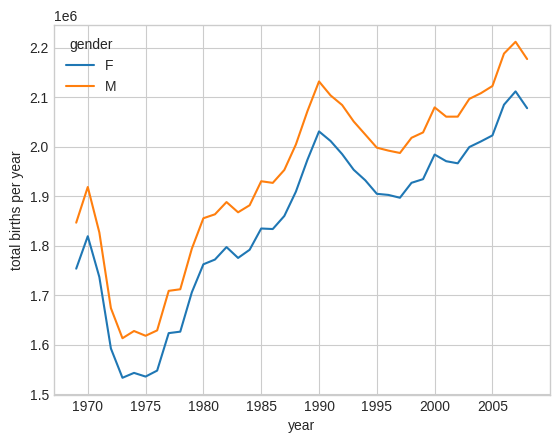

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
births.pivot_table(
    "births", index="year", columns="gender", aggfunc="sum"
).plot()
plt.ylabel("total births per year")

In [6]:
quartiles = np.percentile(births["births"], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])  # .74 из распределения гауса 

In [8]:
# фильтрация значения за пределами сигма-дистрибуции (
# то есть за пределами нормального распределения):

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [9]:
# set "day" column to integer; it originally was a string due to nulls 
births["day"] = births["day"].astype(int)

In [10]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(
    10_000 * births.year + 
    100 * births.month + 
    births.day, format="%Y%m%d"
)
births["dayofweek"] = births.index.dayofweek 

Text(0, 0.5, 'mean births by day')

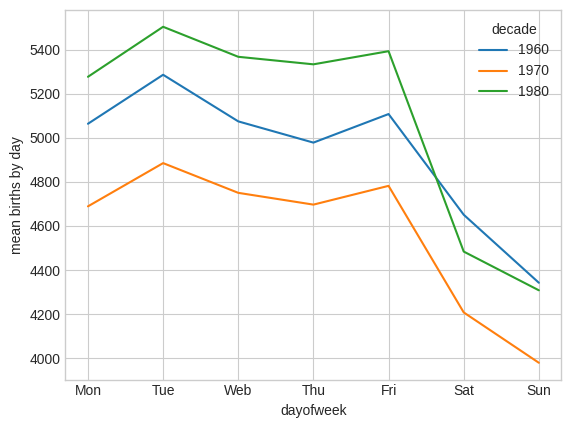

In [11]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

births.pivot_table("births", index = "dayofweek", 
                   columns="decade", aggfunc="mean").plot()
plt.gca().set(xticks = range(7), xticklabels = ["Mon","Tue","Web","Thu",
                                                "Fri","Sat","Sun"])
plt.ylabel("mean births by day")

In [13]:
births_by_date = births.pivot_table("births", 
                                   [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [14]:
# строим новый индекс (точнее обнвляем тот что был)
# на базе массива 
# в котором будут даты набранные из month,day содержащихся в оригинале 
# в births_by_date.index 

from datetime import datetime 
births_by_date.index = [
    datetime(2012,month,day) 
    for (month,day) in births_by_date.index 
]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


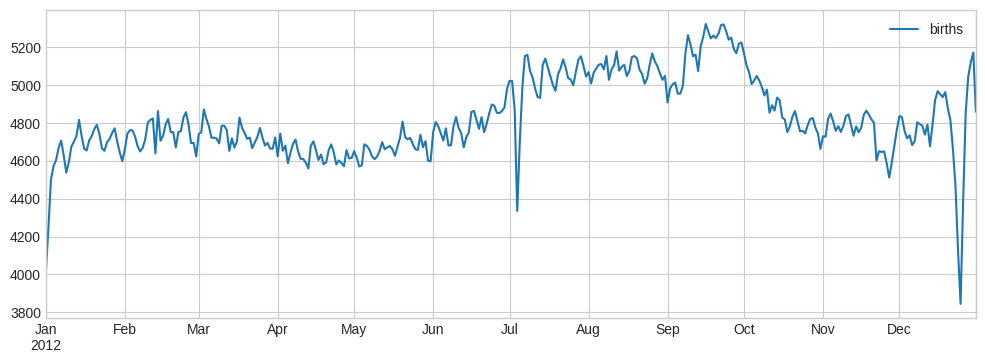

In [15]:
# plot the results 
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);